<a href="https://colab.research.google.com/github/oumayra/Git_course/blob/main/Fashion_MNISTT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


In [4]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(x_train)


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [8]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=[early_stop]
)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 173s 181ms/step - accuracy: 0.6136 - loss: 1.1648 - val_accuracy: 0.8117 - val_loss: 0.4881
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 163s 173ms/step - accuracy: 0.7644 - loss: 0.6166 - val_accuracy: 0.8383 - val_loss: 0.4263
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 167s 178ms/step - accuracy: 0.7947 - loss: 0.5376 - val_accuracy: 0.8467 - val_loss: 0.4144
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 166s 177ms/step - accuracy: 0.8116 - loss: 0.5009 - val_accuracy: 0.8685 - val_loss: 0.3492
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 167s 178ms/step - accuracy: 0.8255 - loss: 0.4639 - val_accuracy: 0.8644 - val_loss: 0.3492
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 165s 176ms/step - accuracy: 0.8320 - loss: 0.4518 - val_accuracy: 0.8615 - val_loss: 0.3605
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 162s 173ms/step - accuracy: 0.8405 - loss: 0.4372 - val_accuracy: 0.8453 - val_loss: 0.3898


In [9]:
loss, acc = model.evaluate(x_test, y_test)
print("Accuracy finale :", acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8671 - loss: 0.3501
Accuracy finale : 0.8684999942779541


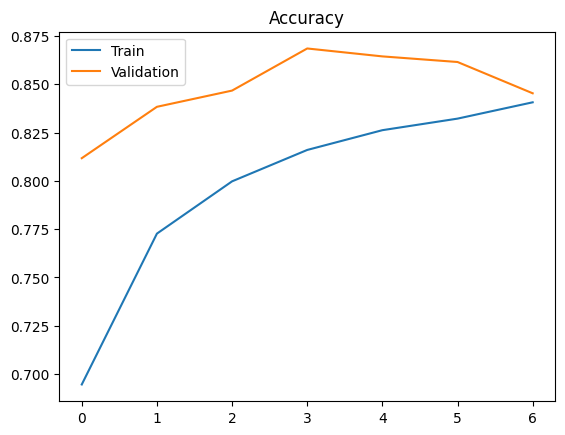

In [10]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.title("Accuracy")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


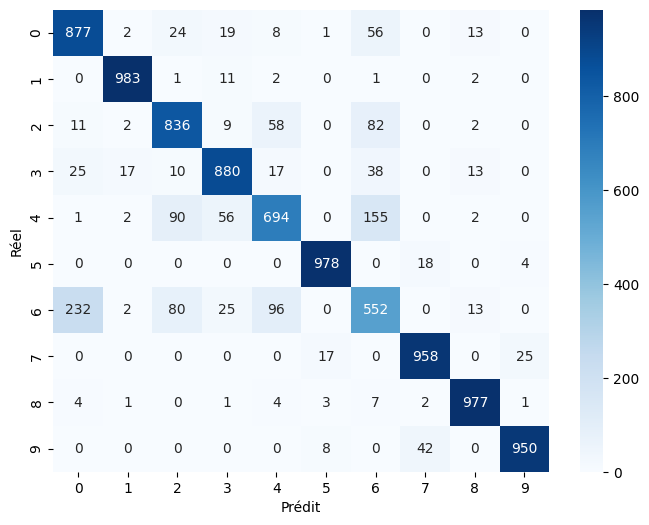

In [11]:
y_pred = np.argmax(model.predict(x_test), axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()


In [12]:
model.save("cnn_fashion_mnist_advanced.h5")


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

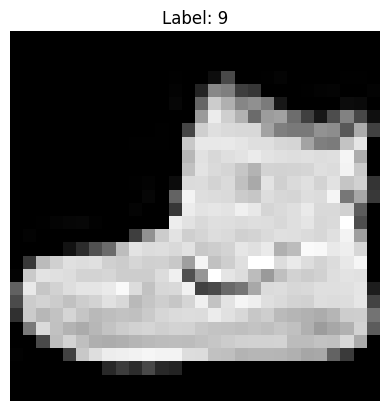

In [13]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

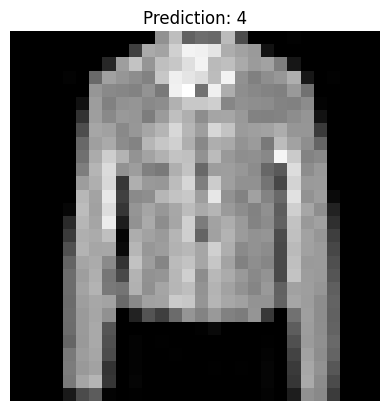

In [14]:
predictions = model.predict(x_test)

index = 10
plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title(f"Prediction: {np.argmax(predictions[index])}")
plt.axis('off')